## Problem statement
You have to write a python script which can fetch all the tweets(as many as allowed by Twitter
API) done by [midas@IIITD](https://twitter.com/midasIIITD) twitter handle and dump the responses into JSONlines file.
The other part of your script should be able to parse these JSONline files to display the
following for every tweet in a tabular format.
* The text of the tweet.
* Date and time of the tweet.
* The number of favorites/likes.
* The number of retweets.
* Number of Images present in Tweet. If no image returns None.

### Imports

First step is to import the required libraries for our task.
* [Tweepy](http://www.tweepy.org/) is the Python library that can be used to access Twitter API.
* Other libraries to be imported are:
    * [json](https://docs.python.org/3.7/library/json.html) - For reading/writing JSON Line files.
    * [os](https://docs.python.org/3.7/library/os.html) - For OS dependent functionalities such as manipulating path etc.
    * [pandas](https://pandas.pydata.org/) - A data analysis library. Here, in this notebook, Pandas is used to display information in tabular form.
 
    

In [1]:
import tweepy
from tweepy import OAuthHandler
import json
import os
import pandas as pd

In [2]:
#Path for storing/retrieving JSON file
FILE_PATH = os.path.join(os.getcwd(), "/Users/Akshay/Desktop/tweets.json")

### Authorization

For accessing data from Twitter API, we'd have to complete an authorization step. For this, it is required to have a [developer](https://developer.twitter.com/) account. After creating the account, we just have to [create a new app](https://developer.twitter.com/en/apps) and follow the guidlines for filling up some details. Once the app is created successfully, we'll be able to find a page where we can see/generate the consumer key, consumer secret key, access token and access token secret. It is recommended to not make these public, hence `#` is used in the following cell.

In [9]:
ACCESS_TOKEN = "900020691294068737-ELhDTNlTtKsNiZIv43zLoUIpGdiMloP"
ACCESS_TOKEN_SECRET = "hwjZkbA4kC4nbGTdKsPuBeryqFjNKug4CVoO26MkTtAfI"
CONSUMER_KEY = "Da2qWtgYZ17hHWsyPYWJAg9aP" 
CONSUMER_SECRET_KEY = "C19tYpfm6U6t0EZgPPMaJFI3mlagznyeTsFTEELd4GeayzofyU"

Tweepy supports accessing Twitter via Basic Authentication and the newer method, OAuth. Twitter has stopped accepting Basic Authentication so we'd have to use OAuth to use the Twitter API. Following cell shows how we can get access to the Twitter API using tweepy with OAuth:

In [10]:
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

At this point, Authorization step is completed and now we can head staright to the task. 

## First Part - Fetch Tweets and Dump them into JSON Line file

 In the following cell, the function, `fetch_and_dump_tweets(screen_name)` will fetch most recent tweets (only upto 3200) by `screen_name` and dump them into the JSON file specified earlier by `FILE_PATH`. Specifically, [user_timeline](https://developer.twitter.com/en/docs/tweets/timelines/api-reference/get-statuses-user_timeline.html) API method is used which will return a collection of most recent tweets up to a maximum of 200 per distinct request. Note that, `max_id`, an optional parameter has been added when invoking `user_timeline` after first time. It has been added to return the result with an ID less than (that is, older than) or equal to the specified ID.

In [11]:
def fetch_and_dump_tweets(screen_name):
    '''
    Parameters-
        screen_name: Twitter handle of the user
    Variables -
        tweets: List (of length upto 200) of tweets by screen_name
        oldest: Index of oldest fetched tweet
        all_tweets_json: List of _json data from all_tweets
    Returns -   
        all_tweets: List of all tweets by screen_name
    '''
    #all_tweets intialized as an empty list
    all_tweets = []
    
    #most recent tweets upto maximum of 200
    tweets = api.user_timeline(screen_name = screen_name,count=200)
    
    #add tweets to all_tweets
    all_tweets.extend(tweets)
    
    #ID of the most recent fetched tweet - 1
    oldest = all_tweets[-1].id - 1
    
    #fetch tweets that are older than most recent 200 tweets until no tweet is left or 3200 limit is reached
    while len(tweets) > 0:
        
        tweets = api.user_timeline(screen_name = screen_name, count=200, max_id=oldest)
        all_tweets.extend(tweets)
        oldest = all_tweets[-1].id - 1

    print(f"Total number of tweets from {screen_name} are {len(all_tweets)}")
    
    #all_tweets_json initialized as an empty list
    all_tweets_json = []
    
    #append _json corresponding to each of the tweet to the all_tweets_json
    for tweet in all_tweets:
        all_tweets_json.append(tweet._json)
        
    #dumping all_tweets_json to the file specified by FILE_PATH
    #sort_keys is set to True for sorting dictionaries by key
    #indent = 4, for pretty printing JSON array elements with indent level of 4
    with open(FILE_PATH, 'w', encoding='utf8') as f:
        json.dump(all_tweets_json, f, sort_keys = True,indent = 4)
    return all_tweets

Now we'll call this method to fetch tweets by [midas@IIITD](https://twitter.com/midasIIITD).

In [12]:
tweets_by_MIDAS = fetch_and_dump_tweets("midasIIITD")

Total number of tweets from midasIIITD are 296


Now, let's load the JSON file into `MIDAS_json`.

In [16]:
with open(FILE_PATH) as json_file:  
    MIDAS_json = json.load(json_file)

Let's have a look at how one of these tweet looks like in JSON format.

In [25]:
MIDAS_json[12]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 12 14:37:55 +0000 2019',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [{'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1105478029147553792',
    'indices': [110, 133],
    'url': 'https://t.co/XEkcYO8KmW'}],
  'user_mentions': [{'id': 1021355762575073281,
    'id_str': '1021355762575073281',
    'indices': [23, 34],
    'name': 'MIDAS IIITD',
    'screen_name': 'midasIIITD'}]},
 'favorite_count': 16,
 'favorited': False,
 'geo': None,
 'id': 1105478029147553792,
 'id_str': '1105478029147553792',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 4,
 'retweeted': False,
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web C

It looks like `entities` is the one which provides metadata related to a particular tweet. Let's look at going through the `expanded_url` at how this tweet actually looks like on Twitter. 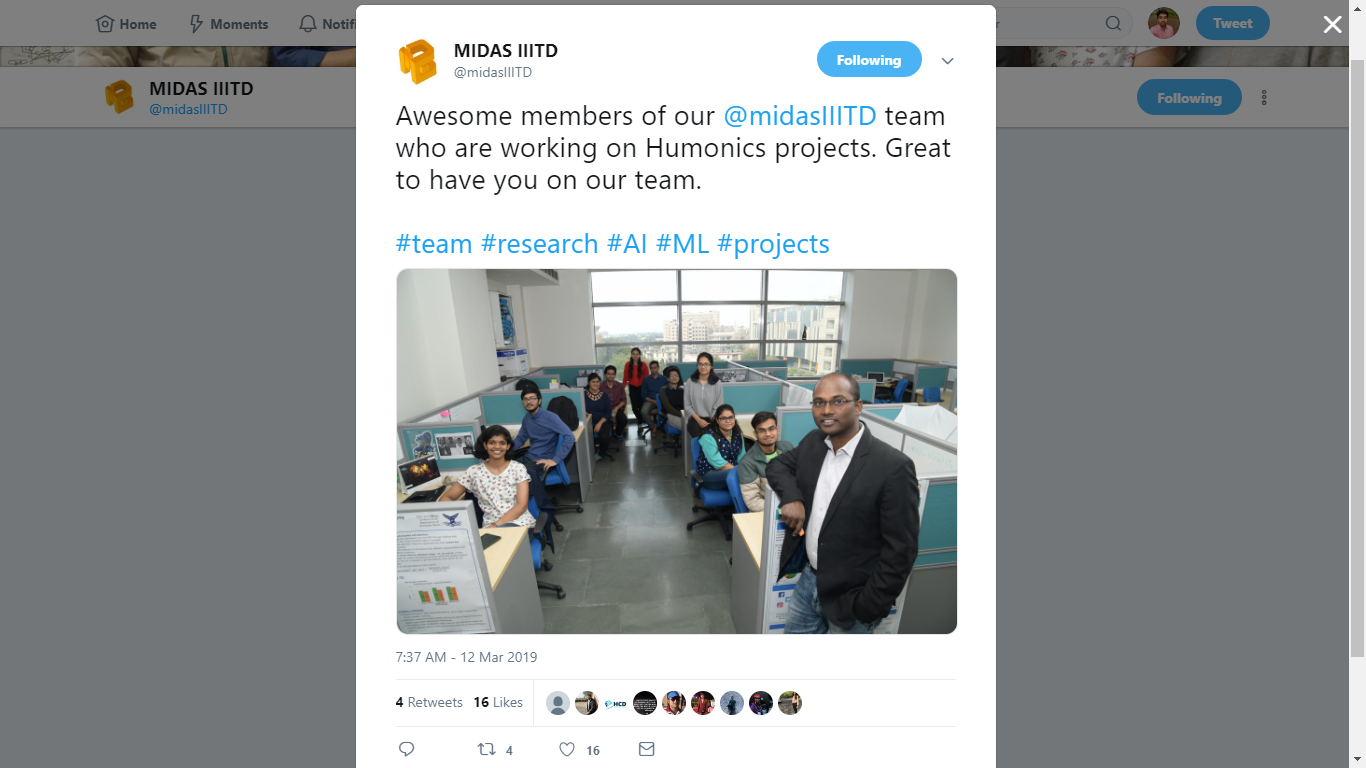<center><i>A snapshot of tweet made on March 12.</i></center><br>
As we can see, this tweet contains an image but there is no detail present about it in `entities`. Hence, we'd have to modify the function `fetch_and_dump_tweets` to get the complete information. After going through this [documentation](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/entities-object.html), it seems we'll have to include `extended_entities` corresponding to each tweet to the JSON file. This can be done by adding parameter `tweet_mode` to the `user_timeline` API method and setting it to `extended`. Now we are good to go:

In [28]:
#Redefining the fetch_and_dump_tweets method.

def fetch_and_dump_tweets(screen_name):
    '''
    Parameters-
        screen_name: Twitter handle of the user
    Variables -
        tweets: List (of length upto 200) of tweets by screen_name
        oldest: Index of oldest fetched tweet
        all_tweets_json: List of _json data from all_tweets
    Returns -   
        all_tweets: List of all tweets by screen_name
    '''
    #all_tweets intialized as an empty list
    all_tweets = []
    
    #most recent tweets upto maximum of 200
    #Note that, this time an additional parameter, tweet_mode has been added
    tweets = api.user_timeline(screen_name = screen_name,count=200, tweet_mode='extended')
    
    #add tweets to all_tweets
    all_tweets.extend(tweets)
    
    #ID of the most recent fetched tweet - 1
    oldest = all_tweets[-1].id - 1
    
    #fetch tweets that are older than most recent 200 tweets until no tweet is left or 3200 limit is reached
    while len(tweets) > 0:
        
        #Note that, this time an additional parameter, tweet_mode has been added
        tweets = api.user_timeline(screen_name = screen_name, count=200, max_id=oldest, tweet_mode='extended')
        all_tweets.extend(tweets)
        oldest = all_tweets[-1].id - 1

    print(f"Total number of tweets from {screen_name} are {len(all_tweets)}")
    
    #all_tweets_json initialized as an empty list
    all_tweets_json = []
    
    #append _json corresponding to each of the tweet to the all_tweets_json
    for tweet in all_tweets:
        all_tweets_json.append(tweet._json)
        
    #dumping all_tweets_json to the file specified by FILE_PATH
    #sort_keys is set to True for sorting dictionaries by key
    #indent = 4, for pretty printing JSON array elements with indent level of 4
    with open(FILE_PATH, 'w', encoding='utf8') as f:
        json.dump(all_tweets_json, f, sort_keys = True,indent = 4)
    return all_tweets

In [29]:
tweets_by_MIDAS = fetch_and_dump_tweets("midasIIITD")

Total number of tweets from midasIIITD are 296


In [30]:
with open(FILE_PATH) as json_file:  
    MIDAS_json = json.load(json_file)

Now, let's look at the `entities` of the same tweet.

In [33]:
MIDAS_json[12]['entities']

{'hashtags': [{'indices': [111, 116], 'text': 'team'},
  {'indices': [117, 126], 'text': 'research'},
  {'indices': [127, 130], 'text': 'AI'},
  {'indices': [131, 134], 'text': 'ML'},
  {'indices': [135, 144], 'text': 'projects'}],
 'media': [{'display_url': 'pic.twitter.com/lN7hItwPO9',
   'expanded_url': 'https://twitter.com/midasIIITD/status/1105478029147553792/photo/1',
   'id': 1105477322264772610,
   'id_str': '1105477322264772610',
   'indices': [145, 168],
   'media_url': 'http://pbs.twimg.com/media/D1dxxHzXgAIeNSE.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/D1dxxHzXgAIeNSE.jpg',
   'sizes': {'large': {'h': 1338, 'resize': 'fit', 'w': 2048},
    'medium': {'h': 784, 'resize': 'fit', 'w': 1200},
    'small': {'h': 444, 'resize': 'fit', 'w': 680},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/lN7hItwPO9'}],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 1021355762575073281,
   'id_str': '1021355762575073281'

In [34]:
MIDAS_json[12]['extended_entities']

{'media': [{'display_url': 'pic.twitter.com/lN7hItwPO9',
   'expanded_url': 'https://twitter.com/midasIIITD/status/1105478029147553792/photo/1',
   'id': 1105477322264772610,
   'id_str': '1105477322264772610',
   'indices': [145, 168],
   'media_url': 'http://pbs.twimg.com/media/D1dxxHzXgAIeNSE.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/D1dxxHzXgAIeNSE.jpg',
   'sizes': {'large': {'h': 1338, 'resize': 'fit', 'w': 2048},
    'medium': {'h': 784, 'resize': 'fit', 'w': 1200},
    'small': {'h': 444, 'resize': 'fit', 'w': 680},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/lN7hItwPO9'}]}

Success! Now we have the media related information and this completes the first part of our task.

## Second Part - Parse the Json Line file and get the required information in Tabular form

In [43]:
def parse_tweets(FILE_PATH):
    
    with open(FILE_PATH) as json_file:  
        tweets_by_MIDAS = json.load(json_file)
        
        tweet_list=[]

        for tweet in tweets_by_MIDAS:
            tweet_info=dict()

            tweet_info['Text']=tweet['full_text']
            tweet_info['Date and Time']= tweet['created_at']
            #tweet_info['id_str']=tweet['id_str']

            tweet_info['Number of Likes']=tweet['favorite_count']
            tweet_info['Number of Retweets']=tweet['retweet_count']

            if 'media' in tweet['entities']:
                image_count = 0
                tweet_media = tweet['extended_entities']['media']
                for i in range(len(tweet_media)):
                    if(tweet_media[i]['type'] == 'photo'):
                        image_count += 1
                tweet_info['Number of Images'] = image_count
            else:
                #No media in the tweet, hence None
                tweet_info['Number of Images'] = None
            tweet_list.append(tweet_info)
    return tweet_list

In [44]:
MIDAS_info = parse_tweets(FILE_PATH)

In [45]:
MIDAS_info[1]

{'Date and Time': 'Sun Mar 17 14:22:04 +0000 2019',
 'Number of Images': None,
 'Number of Likes': 14,
 'Number of Retweets': 4,
 'Text': 'Congratulations @midasIIITD team, Rohan, Pradyumn, Ramit, @debanjanbhucs, @MADAIguy and @RatnRajiv for getting their paper titled, "SNAP-BATNET: Cascading Author Profiling and Social Network Graphs for Suicide Ideation Detection on Social Media", accepted at @NAACLHLT SRW.'}

In [47]:
MIDAS_df = pd.DataFrame(MIDAS_info)

In [48]:
MIDAS_df

,Date and Time,Number of Images,Number of Likes,Number of Retweets,Text
0,Mon Mar 18 02:27:47 +0000 2019,NaN,6,3,BigMM 2019 : IEEE BigMM 2019 – Call for Worksh...
1,Sun Mar 17 14:22:04 +0000 2019,NaN,14,4,"Congratulations @midasIIITD team, Rohan, Prady..."
2,Sat Mar 16 14:06:56 +0000 2019,NaN,6,0,We have emailed the task details to all shortl...
3,Sat Mar 16 09:20:29 +0000 2019,NaN,1,1,IEEE BigMM 2019 - Call for Workshop Proposals....
4,Sat Mar 16 09:14:58 +0000 2019,NaN,7,2,"Congratulations! Arijit, Ramit, @debanjanbhucs..."
5,Sat Mar 16 05:13:14 +0000 2019,NaN,7,2,We will be releasing a very interesting task t...
6,Wed Mar 13 17:09:44 +0000 2019,NaN,0,2,RT @hcdiiitd: Last day to register for #Portfo...
7,Wed Mar 13 04:11:24 +0000 2019,1.0,1,0,@ACMMM19 @sigmm @TheOfficialACM @acmmmsys @ACM...
8,Wed Mar 13 04:06:04 +0000 2019,NaN,0,13,RT @ACMMM19: The paper deadline is approaching...
9,Tue Mar 12 17:43:44 +0000 2019,NaN,0,69,RT @kaggle: Bookmark this amazing library of i...
